# Change log

### V1 
* Translated from Excel to Python

### V2 
* Added dots to plot where one system becomes more efficient than another
* Added zoom out plot for rocket, and description of math used to compute intersection points

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "Times New Roman"

Define class for transportation systems

In [2]:
class System:
    
    #each system has a name, average speed, and built in time delay
    def __init__(self, name, speed, delay):
        self.name = name         #string
        self.speed = speed       #float, km/h
        self.delay = delay       #float, min
        self.time = np.empty     #stores times
        self.distance = np.empty #stores distances

Define transportation systems

In [3]:
ltvRoad    = System("Rover Road",               50,    0)
ltvOffroad = System("Rover Offroad",            32,    0)
maglev     = System("Train",                    200,   60)
rocket     = System("Ascent/Descent Vehicle",   1000, 3*60)

systems = [ltvRoad, ltvOffroad, maglev, rocket]

Generate arrays

In [4]:
n = 1000 #number of time steps
tf = 60*13  #final time

#compute values for plotting and comparison
'''
This code just creates points for each system to plot, looping through each system one at a time
'''
for system in systems:
    system.time = np.linspace(0, tf-system.delay, n)
    system.distance = np.zeros(n)
    i = 0
    for t in system.time:
        system.distance[i] = system.speed * t / 60
        i+=1

Compute intersections of lines


$$ T = \frac{1}{v}x + \tau \qquad T = \text{time} \qquad v = \text{speed} \qquad x = \text{distance} \qquad \tau = \text{time delay} $$

Set $T_i = T_j$ to find intersection point between $i$ and $j$ systems, then solve for $x_\text{intersection}$, ensure necessary unit adjustments are made!

$$\frac{1}{v_1}x_\text{intersection} + \tau_1 = \frac{1}{v_2}x_\text{intersection} + \tau_2 \qquad \rightarrow \qquad x_\text{intersection} = \frac{\tau_2 - \tau_1}{\Bigl(\frac{1}{v_1}\Bigl) - \Bigl(\frac{1}{v_2}\Bigl)}$$

Plug $x_\text{intersection}$ in to equation for $T$ to find $T_\text{intersection}$


In [5]:
#Maglev over offroad ltv
maglevOver_ltvOffroad = (maglev.delay / 60 - ltvOffroad.delay / 60) / (1/ltvOffroad.speed - 1/maglev.speed)
tmaglevOver_ltvOffroad = (1/ltvOffroad.speed * maglevOver_ltvOffroad)

#Maglev over road ltv
maglevOver_ltvRoad = (maglev.delay / 60 - ltvRoad.delay / 60) / (1/ltvRoad.speed - 1/maglev.speed)
tmaglevOver_ltvRoad = (1/ltvRoad.speed * maglevOver_ltvRoad)

#rocket over offroad ltv
rocketOver_ltvOffroad = (rocket.delay / 60 - ltvOffroad.delay / 60) / (1/ltvOffroad.speed - 1/rocket.speed)

#rocket over road ltv
rocketOver_ltvRoad = (rocket.delay / 60 - ltvRoad.delay / 60) / (1/ltvRoad.speed - 1/rocket.speed)

#rocket over maglev
rocketOver_maglev = (rocket.delay / 60 - maglev.delay / 60) / (1/maglev.speed - 1/rocket.speed)
trocketOver_maglev = (1/maglev.speed * rocketOver_maglev) + maglev.delay / 60

Plot

================== Efficiency Markers ==================
Rover is most efficient below     66.67  km
Maglev is most efficient between  66.67  km and 500.0 km
Rocket is most efficient above    500.0 km
Rocket is most efficient above     157.89  km


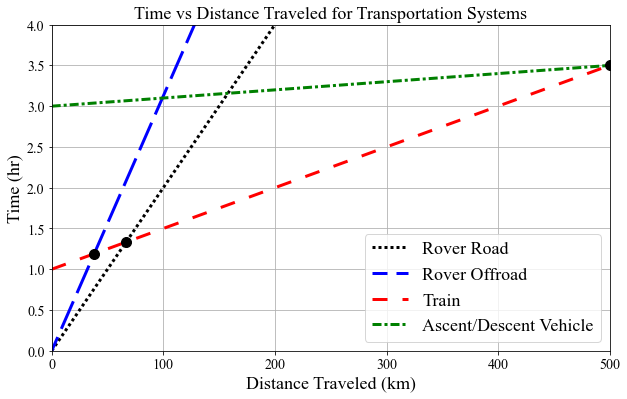

In [6]:
#prepare figure
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
smallfont = 14
bigfont = 18
colors = ["k", "b", "r", "g"]
linestyles = [
     ('dotted',                (0, (1, 1))),
     ('long dash with offset', (5, (10, 3))),
     ('dashed',                (0, (5, 5))),
     ('densely dashdotted',    (0, (3, 1, 1, 1)))
]

#plot
i = 0
for system in systems:
    ax.plot(system.distance, system.time/60 + system.delay/60, colors[i], linestyle = linestyles[i][1], label = system.name, linewidth = 3)
    i+=1

ax.plot(maglevOver_ltvRoad, tmaglevOver_ltvRoad, 'ko', markersize = 10)
ax.plot(maglevOver_ltvOffroad, tmaglevOver_ltvOffroad, 'ko', markersize = 10)
ax.plot(rocketOver_maglev, trocketOver_maglev, 'ko', markersize = 10)


#format
ax.set_xlabel(r'Distance Traveled (km)', fontsize = bigfont)
ax.set_ylabel(r"Time (hr)", fontsize = bigfont)
ax.tick_params(axis='x', labelsize=smallfont)
ax.tick_params(axis='y', labelsize=smallfont)
ax.set_title(r"Time vs Distance Traveled for Transportation Systems", fontsize = bigfont)
ax.legend(loc='lower right', fontsize = bigfont)
ax.grid()

#final plot
plt.subplots_adjust(wspace=0.3, hspace=0.4)
plt.xlim([0, 500])
plt.ylim([0, 4])
plt.savefig('Time vs Distance Traveled for Transportation Systems Zoomed In.png', dpi=500)

#print other outputs
rnd = 2
print("================== Efficiency Markers ==================")
print("Rover is most efficient below    ", np.round(maglevOver_ltvRoad, rnd), " km")
print("Maglev is most efficient between ", np.round(maglevOver_ltvRoad, rnd), " km and", np.round(rocketOver_maglev, rnd), "km")
print("Rocket is most efficient above   ", np.round(rocketOver_maglev, rnd), "km")

print("Rocket is most efficient above    ", np.round(rocketOver_ltvRoad, rnd), " km")


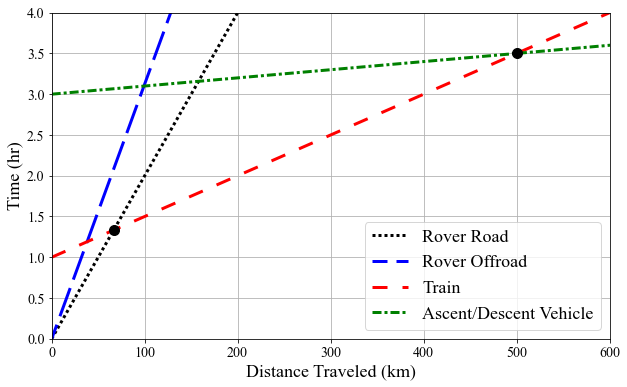

In [7]:
#prepare figure
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

#plot
i = 0
for system in systems:
    ax.plot(system.distance, system.time/60 + system.delay/60, colors[i], linestyle = linestyles[i][1], label = system.name, linewidth = 3)
    i+=1

ax.plot(maglevOver_ltvRoad, tmaglevOver_ltvRoad, 'ko', markersize = 10)
# ax.plot(maglevOver_ltvOffroad, tmaglevOver_ltvOffroad, 'ko', markersize = 10)
ax.plot(rocketOver_maglev, trocketOver_maglev, 'ko', markersize = 10)


#format
ax.set_xlabel(r'Distance Traveled (km)', fontsize = bigfont)
ax.set_ylabel(r"Time (hr)", fontsize = bigfont)
ax.tick_params(axis='x', labelsize=smallfont)
ax.tick_params(axis='y', labelsize=smallfont)
# ax.set_title(r"Time vs Distance Traveled for Transportation Systems", fontsize = bigfont)
ax.legend(loc='lower right', fontsize = bigfont)
ax.grid()

#final plot
plt.subplots_adjust(wspace=0.3, hspace=0.4)
plt.xlim([0, rocketOver_maglev + 100])
plt.ylim([0, rocket.delay/60 + 1])
plt.savefig('Time vs Distance Traveled for Transportation Systems Zoomed Out.png', dpi=500)